In [4]:
import folium
import shapely
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import geopandas as gpd
import numpy as np
import sqlalchemy
from shapely.strtree import STRtree
from WeatherRoutingTool.utils.maps import Map
from shapely.geometry import Point, LineString, box, Polygon
import matplotlib.pyplot as plt

In [5]:
lons_per_step =[2, 3, 6, 8, 9, 10, 12, 14, 16]

In [6]:
lats_per_step =[2, 4, 4, 6, 9, 4, 2, 4, 6]

In [7]:
 # Create LineString segments from X and Y columns
segments = []
for i in range(len(lons_per_step)-1):
    segment = LineString([(lons_per_step[i], lats_per_step[i]), (lons_per_step[i + 1],lats_per_step[i + 1])])
    segments.append(segment)
segments

[<LINESTRING (2 2, 3 4)>,
 <LINESTRING (3 4, 6 4)>,
 <LINESTRING (6 4, 8 6)>,
 <LINESTRING (8 6, 9 9)>,
 <LINESTRING (9 9, 10 4)>,
 <LINESTRING (10 4, 12 2)>,
 <LINESTRING (12 2, 14 4)>,
 <LINESTRING (14 4, 16 6)>]

In [8]:
seamark_lon = [4, 8,10]
seamark_lat = [8, 4, 6]

In [9]:
# Create LineString segments from X and Y columns
segments_s = []
print(len(seamark_lon))
for i in range(len(seamark_lon)-1):
    print(i)
    seamark_segments = LineString([(seamark_lon[i], seamark_lat[i]), (seamark_lon[i + 1],seamark_lat[i + 1])])
    print(seamark_segments)
    segments_s.append(seamark_segments)
    #seamark_segments.append(seamark_segments)
print(segments_s)

3
0
LINESTRING (4 8, 8 4)
1
LINESTRING (8 4, 10 6)
[<LINESTRING (4 8, 8 4)>, <LINESTRING (8 4, 10 6)>]


In [10]:
    # Add LineString segments to a new GeoDataFrame
segments_gdf = gpd.GeoDataFrame(geometry=segments, crs="EPSG:4326")
segments_gdf

,geometry
0,"LINESTRING (2.00000 2.00000, 3.00000 4.00000)"
1,"LINESTRING (3.00000 4.00000, 6.00000 4.00000)"
2,"LINESTRING (6.00000 4.00000, 8.00000 6.00000)"
3,"LINESTRING (8.00000 6.00000, 9.00000 9.00000)"
4,"LINESTRING (9.00000 9.00000, 10.00000 4.00000)"
5,"LINESTRING (10.00000 4.00000, 12.00000 2.00000)"
6,"LINESTRING (12.00000 2.00000, 14.00000 4.00000)"
7,"LINESTRING (14.00000 4.00000, 16.00000 6.00000)"


In [11]:
    # Add LineString segments to a new GeoDataFrame
seamark_gdf = gpd.GeoDataFrame(geometry=segments_s, crs="EPSG:4326")
seamark_gdf

,geometry
0,"LINESTRING (4.00000 8.00000, 8.00000 4.00000)"
1,"LINESTRING (8.00000 4.00000, 10.00000 6.00000)"


<Axes: >

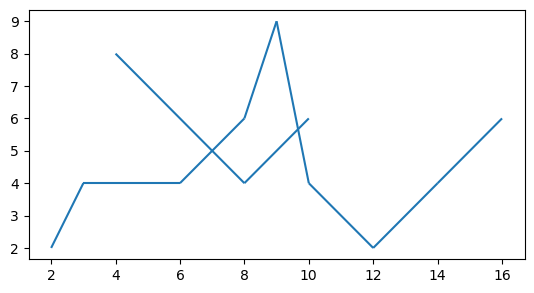

In [12]:
fig, ax =plt.subplots() 
segments_gdf.plot(ax=ax)
seamark_gdf.plot(ax=ax)

In [13]:
# Perform spatial overlay to find intersections
intersection = gpd.overlay(segments_gdf, seamark_gdf, how='intersection',keep_geom_type=False)

# Print the resulting intersection GeoDataFrame
print(intersection)

                  geometry
0  POINT (7.00000 5.00000)
1  POINT (9.66667 5.66667)


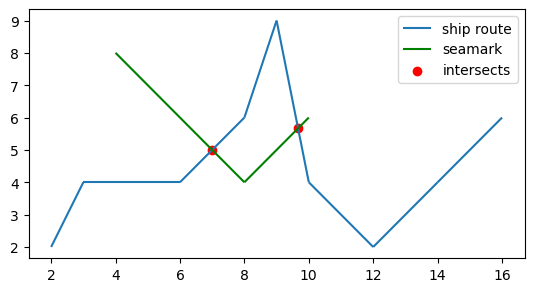

In [14]:
fig, ax =plt.subplots() 
segments_gdf.plot(ax=ax, label = 'ship route')
seamark_gdf.plot(ax=ax, color = 'green', label='seamark')
intersection.plot(ax= ax, color='red', label = 'intersects')
ax.legend()

In [15]:
first_node = 0
indx_intersect= []
for index, seg in segments_gdf.iterrows():
    print('seg',seg)
    for j, inter_point in intersection.iterrows():
        print('interesct point',inter_point)
        buffered_point =  inter_point.geometry.buffer(0.000001)
        val = seg.geometry.intersects(buffered_point)
        print(val)
        if (val ):
            print('____________________________________________')
            indx_intersect.append(index)
            
            #break
    print('##################')
print(indx_intersect)

seg geometry    LINESTRING (2 2, 3 4)
Name: 0, dtype: object
interesct point geometry    POINT (7 5)
Name: 0, dtype: object
False
interesct point geometry    POINT (9.666666666666666 5.666666666666667)
Name: 1, dtype: object
False
##################
seg geometry    LINESTRING (3 4, 6 4)
Name: 1, dtype: object
interesct point geometry    POINT (7 5)
Name: 0, dtype: object
False
interesct point geometry    POINT (9.666666666666666 5.666666666666667)
Name: 1, dtype: object
False
##################
seg geometry    LINESTRING (6 4, 8 6)
Name: 2, dtype: object
interesct point geometry    POINT (7 5)
Name: 0, dtype: object
True
____________________________________________
interesct point geometry    POINT (9.666666666666666 5.666666666666667)
Name: 1, dtype: object
False
##################
seg geometry    LINESTRING (8 6, 9 9)
Name: 3, dtype: object
interesct point geometry    POINT (7 5)
Name: 0, dtype: object
False
interesct point geometry    POINT (9.666666666666666 5.666666666666667)
Name

In [16]:
indx_intersect

[2, 4]

In [17]:
segments_before_df = segments_gdf[0:indx_intersect[0]]
segments_before_df

,geometry
0,"LINESTRING (2.00000 2.00000, 3.00000 4.00000)"
1,"LINESTRING (3.00000 4.00000, 6.00000 4.00000)"


In [18]:
type(indx_intersect)

list

In [19]:
segments_gdf

,geometry
0,"LINESTRING (2.00000 2.00000, 3.00000 4.00000)"
1,"LINESTRING (3.00000 4.00000, 6.00000 4.00000)"
2,"LINESTRING (6.00000 4.00000, 8.00000 6.00000)"
3,"LINESTRING (8.00000 6.00000, 9.00000 9.00000)"
4,"LINESTRING (9.00000 9.00000, 10.00000 4.00000)"
5,"LINESTRING (10.00000 4.00000, 12.00000 2.00000)"
6,"LINESTRING (12.00000 2.00000, 14.00000 4.00000)"
7,"LINESTRING (14.00000 4.00000, 16.00000 6.00000)"


In [20]:
last_index = indx_intersect[len(indx_intersect)-1]
last_index = last_index+1

In [21]:
segments_after = segments_gdf[last_index:]
segments_after

,geometry
5,"LINESTRING (10.00000 4.00000, 12.00000 2.00000)"
6,"LINESTRING (12.00000 2.00000, 14.00000 4.00000)"
7,"LINESTRING (14.00000 4.00000, 16.00000 6.00000)"


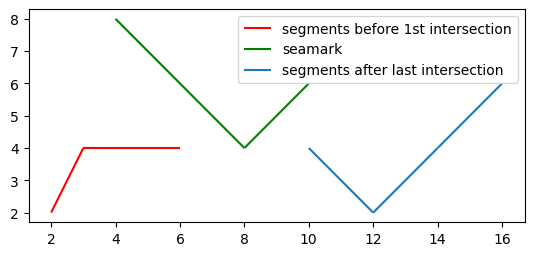

In [22]:
fig, ax =plt.subplots() 
segments_before_df.plot(ax= ax, color='red', label = 'segments before 1st intersection')
seamark_gdf.plot(ax=ax, color = 'green', label='seamark')
segments_after.plot(ax=ax, label = 'segments after last intersection')
ax.legend()

## Get the last node

In [23]:
first_node_line = segments_before_df.tail(1).geometry.get_coordinates()
point_end =first_node_line.tail(1)
point_end
#last = Point(first_node_line.geomtery.coords[-1])


,x,y
1,6.0,4.0


In [24]:
first_node_line = segments_after.head(1).geometry.get_coordinates()
point_start =first_node_line.tail(1)
point_start

,x,y
5,12.0,2.0


In [32]:
first_node_line = segments_before_df.tail(1).geometry.get_coordinates()
point_start = first_node_line.tail(1)
print(point_start)
point_A = Point(point_start.x, point_start.y)
    

first_node_line = segments_after.head(1).geometry.get_coordinates()
point_end = first_node_line.head(1)
print(point_end)
point_B = Point(point_end.x, point_end.y)
    
points = [point_A, point_B]
p = gpd.GeoSeries(points)
 

     x    y
1  6.0  4.0
      x    y
5  10.0  4.0


<Axes: >

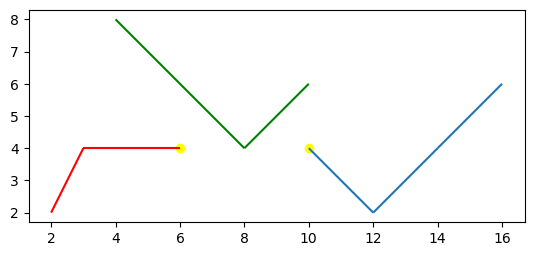

In [33]:
fig, ax =plt.subplots() 
segments_before_df.plot(ax= ax, color='red', label = 'segments before 1st intersection')
seamark_gdf.plot(ax=ax, color = 'green', label='seamark')
segments_after.plot(ax=ax, label = 'segments after last intersection')
p.plot(ax=ax, color = 'yellow')

<Axes: >

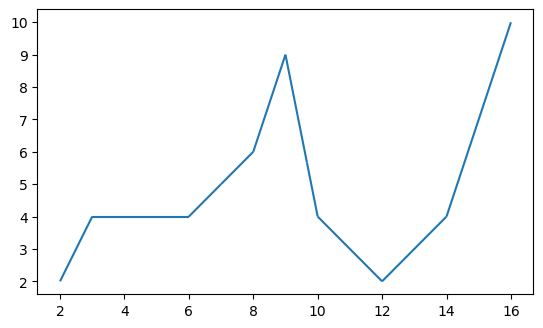

In [139]:
res_difference = segments_gdf.overlay(seamark_gdf, how='difference')
res_difference.plot()

In [109]:
res_difference

,geometry
0,"LINESTRING (2.00000 2.00000, 3.00000 4.00000)"
1,"LINESTRING (3.00000 4.00000, 6.00000 4.00000)"
2,"MULTILINESTRING ((6.00000 4.00000, 7.00000 5.0..."
3,"LINESTRING (8.00000 6.00000, 9.00000 7.00000)"
4,"MULTILINESTRING ((9.00000 7.00000, 9.50000 5.5..."
5,"LINESTRING (10.00000 4.00000, 12.00000 2.00000)"
6,"LINESTRING (12.00000 2.00000, 14.00000 4.00000)"
